In [1]:
import json
import tweepy
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import seaborn as sns
import time
from datetime import datetime

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser= tweepy.parsers.JSONParser())



In [3]:
target_accounts = ["@Suntimes", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# api.user_timeline("@Suntimes", page=x)

In [16]:
faizan = api.user_timeline("@faizank2396", page=1)

for tweet in faizan:
    pprint("-----" * 15)
    pprint(tweet)

'---------------------------------------------------------------------------'
{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jun 06 03:34:11 +0000 2019',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1136476350125084672,
 'id_str': '1136476350125084672',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'und',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'FVV!!!!!!!!',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Apr 17 00:58:48 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Jabr

          'entities': {'description': {'urls': []}},
          'favourites_count': 4137,
          'follow_request_sent': False,
          'followers_count': 286,
          'following': False,
          'friends_count': 449,
          'geo_enabled': True,
          'has_extended_profile': True,
          'id': 1358233814,
          'id_str': '1358233814',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': None,
          'listed_count': 1,
          'location': 'Chicago, IL',
          'name': 'Faizan',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1358233814/1519706145',
          'profile_image_url': 

                                                            'source_user': {'contributors_enabled': False,
                                                                            'created_at': 'Thu '
                                                                                          'Aug '
                                                                                          '02 '
                                                                                          '06:14:37 '
                                                                                          '+0000 '
                                                                                          '2018',
                                                                            'default_profile': True,
                                                                            'default_profile_image': False,
                                                                            'description': 'I '

                                                               'url': 'https://video.twimg.com/ext_tw_video/1128483697559126016/pu/vid/320x180/lBFGFW8M1yFrtU2Q.mp4?tag=9'}]}}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1128807258903764992,
 'id_str': '1128807258903764992',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 13593,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Wed May 15 02:14:22 +0000 2019',
                      'entities': {'hashtags': [],
                                   'media': [{'display_url': 'pic.twitter.com/LilwUhRpwm',
                                              'expanded_url': 'https://twitter.com/LakeShowYo/status/112

                      'extended_entities': {'media': [{'additional_media_info': {'monetizable': False,
                                                                                 'source_user': {'contributors_enabled': False,
                                                                                                 'created_at': 'Thu '
                                                                                                               'Mar '
                                                                                                               '19 '
                                                                                                               '20:19:28 '
                                                                                                               '+0000 '
                                                                                                               '2009',
                                                      

In [25]:
sentiment_list = []

counter = 1

for target in target_accounts:
    
    for x in range(5):
        public_tweets = api.user_timeline(target, page= x)
        
        index = 0
        
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            sentiment_list.append({"User Account": tweet["user"]["name"],
                                   "Description": tweet["user"]["description"],
                                   "Url": tweet["user"]["url"],
                                   "Date": tweet["created_at"],
                                   "Source": tweet["source"],
                                   "Text": tweet["text"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})
            
            counter += 1

pprint(sentiment_list)

                

[{'Compound': -0.4019,
  'Date': 'Wed Jun 12 01:20:01 +0000 2019',
  'Description': 'The hardest-working paper in America.',
  'Negative': 0.87,
  'Neutral': 0.13,
  'Positive': 0.0,
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': "University of Chicago Medical Center nurses say they've complained "
          'more than 1,000 times since January 2017 about s… '
          'https://t.co/neRlldRxTo',
  'Tweets Ago': 1,
  'Url': 'https://t.co/9zF6xhXjPG',
  'User Account': 'Chicago Sun-Times'},
 {'Compound': 0.0,
  'Date': 'Wed Jun 12 01:08:43 +0000 2019',
  'Description': 'The hardest-working paper in America.',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'RT @CSTbreaking: Man found in Englewood viaduct remains '
          'unidentified\n'
          'https://t.co/aGkh7dwMDi',
  'Tweets Ago': 2,
  'Url': 'https:/

          'injury, the Sky announced Monday. https://t.co/3PhlquqgrO',
  'Tweets Ago': 90,
  'Url': 'https://t.co/9zF6xhXjPG',
  'User Account': 'Chicago Sun-Times'},
 {'Compound': 0.34,
  'Date': 'Mon Jun 10 23:00:17 +0000 2019',
  'Description': 'The hardest-working paper in America.',
  'Negative': 0.87,
  'Neutral': 0.0,
  'Positive': 0.13,
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'Mayor Lori Lightfoot and Police Superintendent Eddie Johnson take '
          'baby steps to revive community policing program. '
          'https://t.co/WvbRmf7vXC',
  'Tweets Ago': 91,
  'Url': 'https://t.co/9zF6xhXjPG',
  'User Account': 'Chicago Sun-Times'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 10 22:40:00 +0000 2019',
  'Description': 'The hardest-working paper in America.',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Tex

 {'Compound': -0.4404,
  'Date': 'Tue Jun 11 17:39:40 +0000 2019',
  'Description': 'Your source for original reporting and trusted news.',
  'Negative': 0.642,
  'Neutral': 0.23,
  'Positive': 0.128,
  'Source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'Text': '"Zombie snake" found in Eastern U.S. can roll over and play dead '
          'https://t.co/DC1GxPdDak https://t.co/5TBsnWHPeB',
  'Tweets Ago': 164,
  'Url': 'https://t.co/VGut7r2Vg5',
  'User Account': 'CBS News'},
 {'Compound': 0.5106,
  'Date': 'Tue Jun 11 17:20:00 +0000 2019',
  'Description': 'Your source for original reporting and trusted news.',
  'Negative': 0.784,
  'Neutral': 0.0,
  'Positive': 0.216,
  'Source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'Text': 'Canada\'s "Free Willy" bill bans keeping orcas and dolphins in '
          'captivity https://t.co/x8548lkL9J https://t.co/KXrkzGUjFE',
  'Tweets Ago': 165,
  'Url': 'https://t.co/VGut7r2Vg5',
  'User Accou

  'Text': 'Wendy Williams is set to make history as the first Canadian female '
          'captain of a major cruise ship when she takes th… '
          'https://t.co/Ljuuf07fzt',
  'Tweets Ago': 228,
  'Url': 'http://t.co/IaghNW8Xm2',
  'User Account': 'CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Jun 12 00:38:15 +0000 2019',
  'Description': 'It’s our job to #GoThere & tell the most difficult stories. '
                 'Join us! For more breaking news updates follow @CNNBRK  & '
                 'Download our app ?https://t.co/UCHG9M367J',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': '.@CillizzaCNN: "Biden is marching to the message of a very '
          'different drummer…His pitch is that with Trump gone, thi… '
          'https://t.co/26b312iYOS',
  'Tweets Ago': 229,
  'Url': 'http://t.co/IaghNW8Xm2',
  'User Account': 'CNN'},
 {'Compound': 0.0772,
  'Date': 'Wed Jun 12 00:30:04 +00

  'Neutral': 0.269,
  'Positive': 0.115,
  'Source': '<a href="http://twitter.com" rel="nofollow">Twitter Web '
            'Client</a>',
  'Text': 'Breaking News: Grand jury indicts captain of Missouri duck boat '
          'that sank in severe weather, killing 17 people '
          'https://t.co/ffOOgzRwdo',
  'Tweets Ago': 302,
  'Url': 'http://t.co/ZYG58XZtAC',
  'User Account': 'Fox News'},
 {'Compound': -0.7783,
  'Date': 'Thu Nov 08 15:14:45 +0000 2018',
  'Description': "Follow America's #1 cable news network, delivering you "
                 'breaking news, insightful analysis, and must-see videos. '
                 'https://t.co/3gb0b8MMza',
  'Negative': 0.638,
  'Neutral': 0.362,
  'Positive': 0.0,
  'Source': '<a href="http://twitter.com" rel="nofollow">Twitter Web '
            'Client</a>',
  'Text': 'JUST IN: Police identify gunman who opened fire inside California '
          'bar, killing 12 https://t.co/PvITYr54AX',
  'Tweets Ago': 303,
  'Url': 'http://t.co/ZYG58X

                 'breaking news, insightful analysis, and must-see videos. '
                 'https://t.co/3gb0b8MMza',
  'Negative': 0.783,
  'Neutral': 0.217,
  'Positive': 0.0,
  'Source': '<a href="https://about.twitter.com/products/tweetdeck" '
            'rel="nofollow">TweetDeck</a>',
  'Text': 'Sex offender gets 22 years after missing boy, 14, found in his room '
          'at halfway house, authorities say https://t.co/sDd0VQzob4',
  'Tweets Ago': 375,
  'Url': 'http://t.co/ZYG58XZtAC',
  'User Account': 'Fox News'},
 {'Compound': 0.3182,
  'Date': 'Thu Nov 08 05:41:00 +0000 2018',
  'Description': "Follow America's #1 cable news network, delivering you "
                 'breaking news, insightful analysis, and must-see videos. '
                 'https://t.co/3gb0b8MMza',
  'Negative': 0.72,
  'Neutral': 0.088,
  'Positive': 0.192,
  'Source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media '
            'Studio</a>',
  'Text': '.@POTUS touts Senate gain

                 '10 p.m. on FX and on Hulu the next day. \n'
                 '\n'
                 'News tips? Share them here: https://t.co/ghL9OoYKMM',
  'Negative': 0.854,
  'Neutral': 0.146,
  'Positive': 0.0,
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': "President Trump's statement came a day after Mexico’s foreign "
          'minister publicly denied that his country has an undi… '
          'https://t.co/rpTj0sU9bt',
  'Tweets Ago': 447,
  'Url': 'http://t.co/ahvuWqicF9',
  'User Account': 'The New York Times'},
 {'Compound': 0.1027,
  'Date': 'Tue Jun 11 19:00:06 +0000 2019',
  'Description': '"The Weekly" is our new TV series. Episodes air Sundays at '
                 '10 p.m. on FX and on Hulu the next day. \n'
                 '\n'
                 'News tips? Share them here: https://t.co/ghL9OoYKMM',
  'Negative': 0.855,
  'Neutral': 0.064,
  'Positive': 0.081,
  'Source': '<a href="http://www.socialflow.com" rel="nofollow"

In [7]:
sentiment_df = pd.DataFrame.from_dict(sentiment_list)
sentiment_df

,Compound,Date,Description,Negative,Neutral,Positive,Source,Text,Tweets Ago,Url,User Account
0,-0.7579,Wed Jun 12 00:20:00 +0000 2019,The hardest-working paper in America.,0.735,0.265,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",A mother accused of murdering her own 5-year-o...,1,https://t.co/9zF6xhXjPG,Chicago Sun-Times
1,0.0000,Wed Jun 12 00:00:09 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",With a new mayor and Chicago Public Schools bo...,2,https://t.co/9zF6xhXjPG,Chicago Sun-Times
2,0.0000,Tue Jun 11 23:40:03 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Chicago will have its longest pedestrian river...,3,https://t.co/9zF6xhXjPG,Chicago Sun-Times
3,0.0000,Tue Jun 11 23:20:03 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",There are four days to go before the electric ...,4,https://t.co/9zF6xhXjPG,Chicago Sun-Times
4,0.0000,Tue Jun 11 23:00:16 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",The Laquan McDonald shooting was a seminal mom...,5,https://t.co/9zF6xhXjPG,Chicago Sun-Times
5,0.0000,Tue Jun 11 22:40:00 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",A member of the Latin Saint street gang allege...,6,https://t.co/9zF6xhXjPG,Chicago Sun-Times
6,0.5994,Tue Jun 11 22:00:19 +0000 2019,The hardest-working paper in America.,0.813,0.000,0.187,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Defending champion U.S. national team opened t...,7,https://t.co/9zF6xhXjPG,Chicago Sun-Times
7,0.0000,Tue Jun 11 21:58:38 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",RT @CSTbreaking: Pair in ski masks burglarize ...,8,https://t.co/9zF6xhXjPG,Chicago Sun-Times
8,0.0000,Tue Jun 11 21:41:54 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",RT @fspielman: Ferguson urges Lightfoot to yan...,9,https://t.co/9zF6xhXjPG,Chicago Sun-Times
9,0.0000,Tue Jun 11 21:40:01 +0000 2019,The hardest-working paper in America.,1.000,0.000,0.000,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Real estate billionaire Sam Zell is still tall...,10,https://t.co/9zF6xhXjPG,Chicago Sun-Times


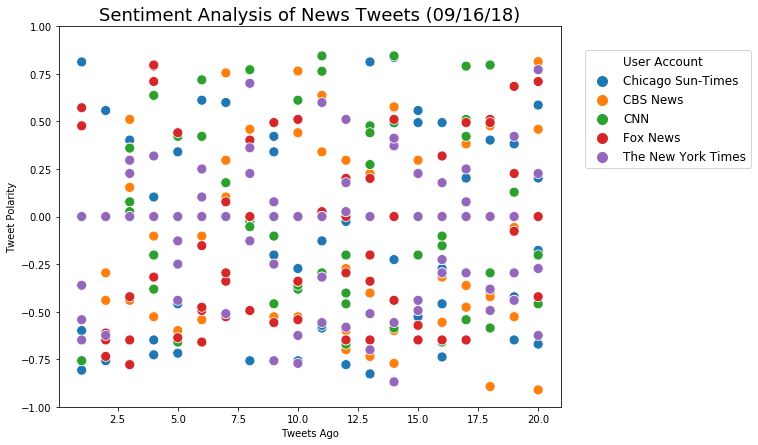

In [20]:
plt.figure(figsize= (9,7))
sns.scatterplot(x= "Tweets Ago",y="Compound", data= sentiment_df, hue="User Account", size = "User Account", sizes = (100,100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2, fontsize=12 )
plt.title("Sentiment Analysis of News Tweets (09/16/18)", size=18)
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)

#name the image file to save figure 
save_image = None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

In [19]:
# Array to hold sentiment
sentiment_list = []
# Counter
counter = 1

# Loop through all target users
for target in target_accounts:
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    for x in range(5):
        
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        index = 0
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            
            
            sentiment_list.append({"User": target,
                                   "Date": tweet["created_at"],
                                   "Source": tweet["source"],
                                   "Name": tweet["user"]["name"],
                                   "Screen Name":tweet["user"]["screen_name"],
                                   "Text": tweet["text"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": len(compound_list)})
            
            index += 1

pprint(sentiment_list)


[{'Compound': 0.0,
  'Date': 'Wed Jun 12 01:08:43 +0000 2019',
  'Name': 'Chicago Sun-Times',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'Suntimes',
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'RT @CSTbreaking: Man found in Englewood viaduct remains '
          'unidentified\n'
          'https://t.co/aGkh7dwMDi',
  'Tweets Ago': 1,
  'User': '@Suntimes'},
 {'Compound': -0.1027,
  'Date': 'Wed Jun 12 01:08:07 +0000 2019',
  'Name': 'Chicago Sun-Times',
  'Negative': 0.783,
  'Neutral': 0.117,
  'Positive': 0.1,
  'Screen Name': 'Suntimes',
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'The fan who was injured by a foul ball Monday at Guaranteed Rate '
          'Field has been released from the hospital,… https://t.co/X25qWxTAf4',
  'Tweets Ago': 2,
  'User': '@Suntimes'},
 {'Compound': 0.0258,
  'Date': 'Wed Jun 12 01:00:08 +0000 2

  'Positive': 0.13,
  'Screen Name': 'Suntimes',
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'Mayor Lori Lightfoot and Police Superintendent Eddie Johnson take '
          'baby steps to revive community policing program. '
          'https://t.co/WvbRmf7vXC',
  'Tweets Ago': 90,
  'User': '@Suntimes'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 10 22:40:00 +0000 2019',
  'Name': 'Chicago Sun-Times',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'Suntimes',
  'Source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout '
            'Social</a>',
  'Text': 'REVIEW: Debuting Wednesday on Netflix, Martin Scorsese’s new '
          'documentary “Rolling Thunder Revue” hits a few minor l… '
          'https://t.co/EnqFaLwL1q',
  'Tweets Ago': 91,
  'User': '@Suntimes'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 10 22:20:00 +0000 2019',
  'Name': 'Chicago Sun-Times',
  'Negative': 1.0,
  'Neutral': 0.0,

            'Search</a>',
  'Text': 'Pres. Trump said today he wants to run against Joe Biden, calling '
          'him the “weakest mentally” in 2020 field… https://t.co/tm1brXZb12',
  'Tweets Ago': 49,
  'User': '@CBSNews'},
 {'Compound': -0.5267,
  'Date': 'Tue Jun 11 21:04:07 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.855,
  'Neutral': 0.145,
  'Positive': 0.0,
  'Screen Name': 'CBSNews',
  'Source': '<a href="http://www.snapstream.com" rel="nofollow">SnapStream TV '
            'Search</a>',
  'Text': '“I believe that the president is literally an existential threat to '
          'America,” Joe Biden said during an event in Iow… '
          'https://t.co/PCbYSji9s4',
  'Tweets Ago': 50,
  'User': '@CBSNews'},
 {'Compound': -0.3612,
  'Date': 'Tue Jun 11 21:00:36 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.783,
  'Neutral': 0.143,
  'Positive': 0.074,
  'Screen Name': 'CBSNews',
  'Source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'Text': 

  'Neutral': 0.096,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'A federal judge dismissed a deadlocked jury in the closely watched '
          'case of a humanitarian aid worker charged with t… '
          'https://t.co/hJPf8v3VUF',
  'Tweets Ago': 30,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Jun 12 00:26:37 +0000 2019',
  'Name': 'CNN',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Rep. Ocasio-Cortez said it appears Democrats are "sitting on their '
          'hands" when it comes to impeachment. Asked if sh… '
          'https://t.co/XqtxAk2Oui',
  'Tweets Ago': 31,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Jun 12 00:24:47 +0000 2019',
  'Name': 'CNN',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a h

  'User': '@FoxNews'},
 {'Compound': -0.34,
  'Date': 'Thu Nov 08 12:25:14 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.87,
  'Neutral': 0.13,
  'Positive': 0.0,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media '
            'Studio</a>',
  'Text': 'Ventura County Fire Department Captain Stan Ziegler: “Hundreds of '
          'first responders responded initially to the scene… '
          'https://t.co/o4gArhmy4e',
  'Tweets Ago': 10,
  'User': '@FoxNews'},
 {'Compound': 0.0258,
  'Date': 'Thu Nov 08 12:06:14 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.795,
  'Neutral': 0.1,
  'Positive': 0.105,
  'Screen Name': 'FoxNews',
  'Source': '<a href="http://twitter.com" rel="nofollow">Twitter Web '
            'Client</a>',
  'Text': 'People comfort each other as they stand near the scene in Thousand '
          'Oaks, Calif. where a gunman opened fire during a… '
          'https://t.co/wPI4XSpirC',
  'Tweets Ago': 11,
 

  'Positive': 0.0,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://about.twitter.com/products/tweetdeck" '
            'rel="nofollow">TweetDeck</a>',
  'Text': 'MLB star @Bharper3407 rejects $300M offer from Nationals: Reports '
          '(via @FoxBusiness) https://t.co/Bgfoyi7fNH',
  'Tweets Ago': 88,
  'User': '@FoxNews'},
 {'Compound': -0.5574,
  'Date': 'Thu Nov 08 03:55:00 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.735,
  'Neutral': 0.265,
  'Positive': 0.0,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://about.twitter.com/products/tweetdeck" '
            'rel="nofollow">TweetDeck</a>',
  'Text': 'Doug Schoen: Trump shouldn’t have fired Jeff Sessions – here’s why '
          'https://t.co/0ITTpZyqyx',
  'Tweets Ago': 89,
  'User': '@FoxNews'},
 {'Compound': 0.5106,
  'Date': 'Thu Nov 08 03:52:26 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.845,
  'Neutral': 0.0,
  'Positive': 0.155,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://stud

  'Name': 'The New York Times',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'President Trump and former Vice President Joe Biden, who are '
          'increasingly sparring and treating each other as polit… '
          'https://t.co/YuBqLqyHJX',
  'Tweets Ago': 68,
  'User': '@nytimes'},
 {'Compound': 0.3612,
  'Date': 'Tue Jun 11 14:15:06 +0000 2019',
  'Name': 'The New York Times',
  'Negative': 0.898,
  'Neutral': 0.0,
  'Positive': 0.102,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'It was like a plot from one of her own novels: On a cold December '
          'night in 1926, Agatha Christie left and didn’t re… '
          'https://t.co/IEsbQqUcHT',
  'Tweets Ago': 69,
  'User': '@nytimes'},
 {'Compound': 0.0772,
  'Date': 'Tue Jun 11 14:00:13 +0000 2019',
  'Name': 'The New York 

In [22]:
sentiment_df = pd.DataFrame.from_dict(sentiment_list)
sentiment_df[["Compound","Date","Name","Negative","Neutral","Positive"]]


,Compound,Date,Name,Negative,Neutral,Positive
0,0.0000,Wed Jun 12 01:08:43 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000
1,-0.1027,Wed Jun 12 01:08:07 +0000 2019,Chicago Sun-Times,0.783,0.117,0.100
2,0.0258,Wed Jun 12 01:00:08 +0000 2019,Chicago Sun-Times,0.743,0.126,0.131
3,0.0772,Wed Jun 12 00:58:14 +0000 2019,Chicago Sun-Times,0.777,0.104,0.119
4,0.0000,Wed Jun 12 00:47:07 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000
5,-0.7579,Wed Jun 12 00:20:00 +0000 2019,Chicago Sun-Times,0.735,0.265,0.000
6,0.0000,Wed Jun 12 00:00:09 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000
7,0.0000,Tue Jun 11 23:40:03 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000
8,0.0000,Tue Jun 11 23:20:03 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000
9,0.0000,Tue Jun 11 23:00:16 +0000 2019,Chicago Sun-Times,1.000,0.000,0.000


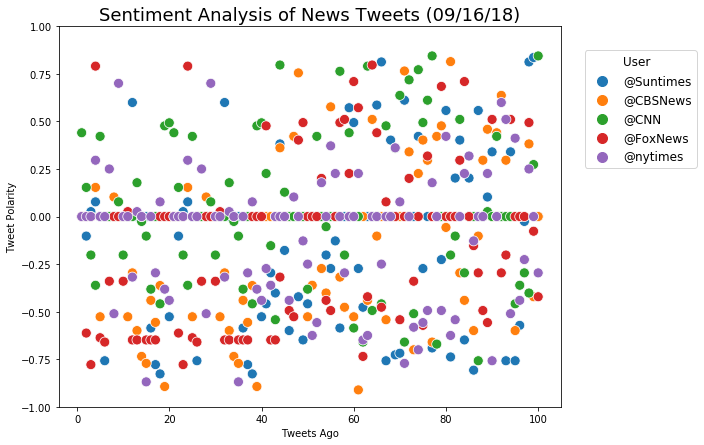

In [23]:
plt.figure(figsize= (9,7))
sns.scatterplot(x= "Tweets Ago",y="Compound", data= sentiment_df, hue="User", size = "User", sizes = (100,100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2, fontsize=12 )
plt.title("Sentiment Analysis of News Tweets (09/16/18)", size=18)
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)

#name the image file to save figure 
save_image = None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

In [ ]:
user_df = sentiment_df[["Screen Name","Date","Compound","Negative","Neutral","Positive"]]
user_groupings = user_df.loc[:,['Screen Name', 'Compound']] 


In [ ]:
bbc_world = user_groupings.loc[user_groupings["Screen Name"] == "BBCWorld",:]
cbs_news = user_groupings.loc[user_groupings["Screen Name"] == "CBSNews",:]
cnn = user_groupings.loc[user_groupings["Screen Name"] == "CNN",:]
fox_news = user_groupings.loc[user_groupings["Screen Name"] == "FoxNews",:]
nytimes = user_groupings.loc[user_groupings["Screen Name"] == "nytimes",:]

bbc_frame=pd.DataFrame({"BBCWorld":bbc_world["Compound"]})
cbs_frame= pd.DataFrame({"CBSNews":cbs_news["Compound"]})
cnn_frame = pd.DataFrame({"CNN":cnn["Compound"]})
fox_frame = pd.DataFrame({"FoxNews":fox_news["Compound"]})
nytimes_frame = pd.DataFrame({"nytimes":nytimes["Compound"]})           
                  


In [ ]:
plt.figure(figsize= (8,6))
p1=plt.bar('BBC',bbc_frame['BBCWorld'].mean())
p2=plt.bar("CBS",cbs_frame["CBSNews"].mean())
p3=plt.bar("CNN",cnn_frame["CNN"].mean())
p4=plt.bar("Fox",fox_frame["FoxNews"].mean())
p5=plt.bar("New York Times",nytimes_frame["nytimes"].mean())

plt.xlabel("User Source", size = 15)
plt.ylabel("Average Polarity",size = 15)

plt.title("Average Polarity of Media Sources", size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid(True,axis="y",alpha=.40)
#name the image file to save figure 
save_image =  None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()